# MARKET MIX MODELLING

### Problem Statement : Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. Major Questions :
#### a. We want to find a FUNCTION that given input budgets for TV, radio and newspaper predicts the output sales.
#### b. Which MEDIA contribute to sales?
#### c.Visualize the RELATIONSHIP between the features and the response using scatter plots.

### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.formula.api as sm
from matplotlib.pyplot import figure

### 2. Load dataset - The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.

In [2]:
df_unclean = pd.read_csv("Advertising.csv")

In [3]:
print(df_unclean.columns)
df_unclean.describe()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
# remove unnamed variable since it is index to the data, not required --
df = df_unclean.copy().drop(['Unnamed: 0'],axis=1)
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 3. EDA :

In [5]:
# Setting X and y variables

X = df.loc[:, df.columns != 'sales']  #features
y = df['sales']  # labels

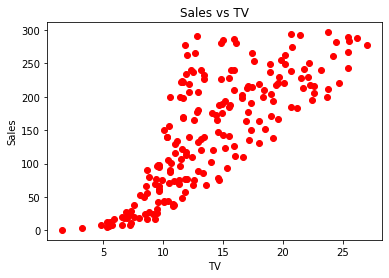

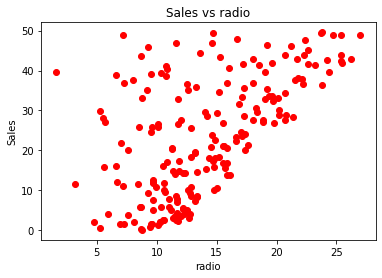

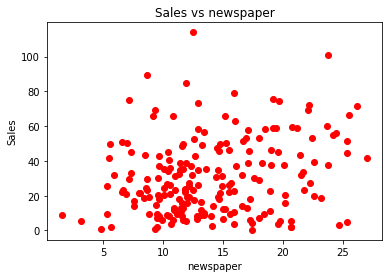

In [6]:
# visual analysis of sales vs features --
for x in X:
    plt.plot(y,X[x],'ro')
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("Sales")
    plt.show()

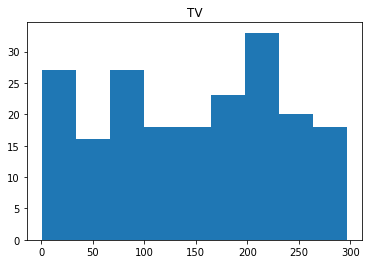

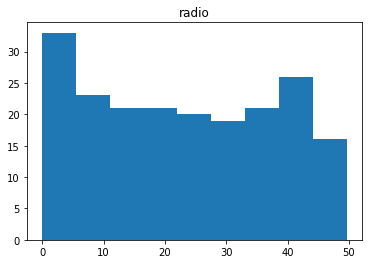

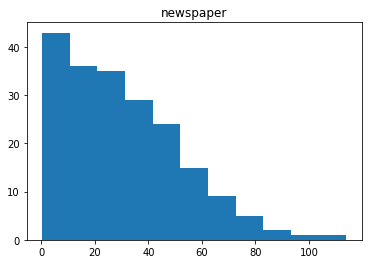

In [7]:
# plotting histogram to check skewness of the features --
for x in X:
    plt.hist(X[x], bins='auto')
    plt.title(x)
    plt.show()

#### OBSERVATION -- The data distribution for 'newspaper' is skrew towards left.

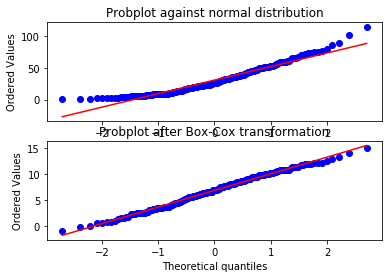

In [8]:
# Using boxcox which helps in removing the data skrewness
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# Use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

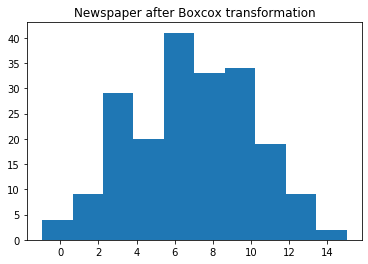

In [9]:
plt.hist(df['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Boxcox transformation")
plt.show()

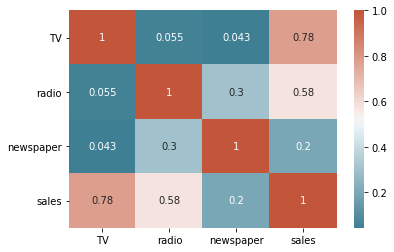

In [10]:
# correlation matrix --
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### OBSERVATION : Strong correlation between TV and sales (0.78),  moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23)

## 4. Random Forest for Features vs Sales --

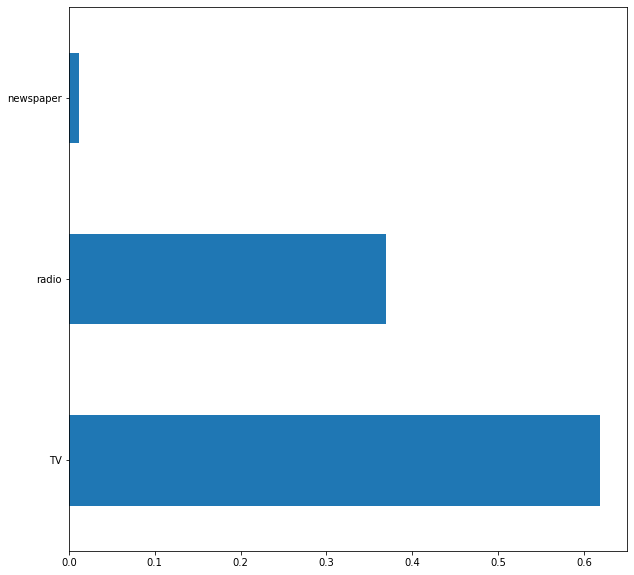

In [12]:
# Building Random Forest model to check each feature with sales --
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

#### OBSERVATION -- There seems to be a pattern, where TV is the most important, followed by radio, leaving newspaper last

## 5. OLS Regression Model :

In [13]:
# estimate parameter of regression --

model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df).fit()
model3 = sm.ols(formula="sales~TV", data=df).fit()

In [14]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        08:30:49   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [15]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.83e-98
Time:                        08:30:50   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [16]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        08:30:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### OBSERVATION -- The Adj. R-squared is 0.896, which means that almost 90 of all variations in our data can be explained by our model (which is pretty good!)

### ANOTHER OBSERVATION -- The p-values for TV and radio are less than 0.000, but the p-value for newspaper is 0.86, which indicates that newspaper spend has no significant impact on sales.

In [21]:
# Models with lowest AIC and BIC are considered the best , which can be accompanied by tests of fit(RMSE,CFI, etc.)

# model 2-- AIC : 778 and BIC 788 -- Parameters, error, and r square:
print('Parameters: ', model2.params)
print('\n R2: ', model2.rsquared)
print('\n Standard errors: ', model2.bse)

Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

 R2:  0.8971942610828956

 Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64


In [25]:
# Definig Actual and Predicted values(for model performance) :

y_pred = model2.predict() 
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
df.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


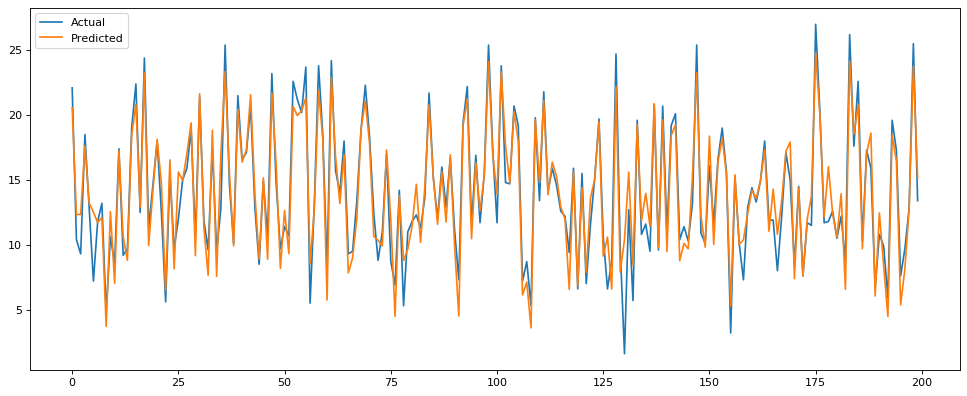

In [26]:
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df['Actual']
y2 = df['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

## Final observation:
#### Values from Model 1 -> sales~TV+radio+newspaper - newspaper Values
#### Coef--0.0060 ;  t-test--0.152 ; p-value--0.860
####  Thus, Newspaper maketing is not affecting sales by any chance (High Pvalue(>0.005) is always fail to reject null hypothesis)